<div style="text-align:left;font-size:2em"><span style="font-weight:bolder;font-size:1.25em">SP2273 | Learning Portfolio</span><br><br><span style="font-weight:bold;color:darkred">Numerical Solutions (Good)</span></div>

## 1 Differential Equations and Euler

### 1.2 What do we mean by changes?

In [1]:
# Differential equations can model systems that change.
# Does not necessarily have to be time
# Can model change in nutrients, space or concentration too e.g.

### 1.3 Calculus: Meaning and Notation

In [2]:
# Learn to speak the language of calculus to describe changes mathematically. 

### 1.4 Calculus: Getting a feel for  $\dfrac{dN}{dt}$

In [3]:
# dN/dt can be approximated by the change of N over time. 
# The smaller dt is, the better the approximation. 

### 1.5 Solving Differential Equations

In [4]:
# Solving a differential equation is finding a mathematical function that satisfies it.
# Solution can either be analytical or numerical. 

### 1.6 The Euler Method

### 1.7 Using Euler for the logistic equation

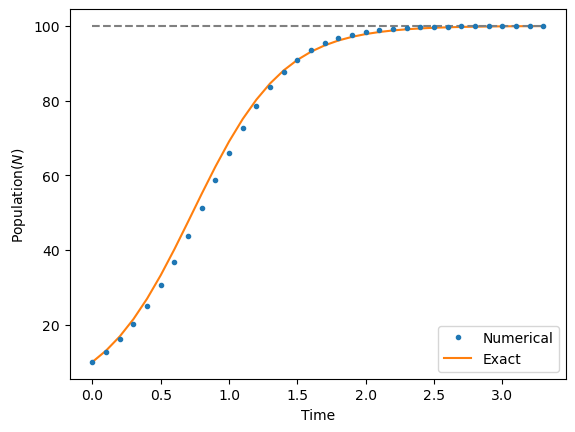

In [4]:
from matplotlib import pyplot as plt

def logistic(time, N0, carrying_capacity, rate):
    C = 1/N0-1/carrying_capacity
    output = (1 + C * carrying_capacity * np.exp(-rate * time))
    output = carrying_capacity / output
    return output # outputs exact solution for the diff eqn. 

N_stop_difference = 1E-2
dt = .1
N0, K, rate = 10, 100, 3
data = {'time': [], 'N': []}
time, N = 0, N0

while True:
    data['time'].append(time)
    data['N'].append(N)
    
    dN = rate * N * (1-N/K) * dt
    N += dN
    time += dt
    
    try:
        if np.abs(data['N'][-1] - data['N'][-2]) <= N_stop_difference:
            break
    except IndexError:
        if len(data['N']) < 2:
            pass
        else:
            print('Trouble')
            quit()

exact_data = logistic(time = np.array(data['time']),
                     N0 = N0,
                     carrying_capacity = K,
                     rate = rate)
plt.plot(data['time'], data['N'], '.', label = 'Numerical')
plt.plot(data['time'], exact_data, label = 'Exact', zorder = 1) 
# zorder pushes the plot back. 

plt.legend(loc = 'lower right')
plt.ylabel('Population($N$)')
plt.xlabel('Time')
plt.hlines(K, 0, data['time'][-1],
          colors = 'grey', ls = 'dashed', zorder = 1)
plt.show()

### 1.8 Some things to note about the code

In [ ]:
# Used a dictionary to hold the time and population data/
# Used a True condition with while loop until I break out.

## 2 Coupled Differential Equations: Predator-Prey Model

### 2.1 The equations

### 2.2 Example code

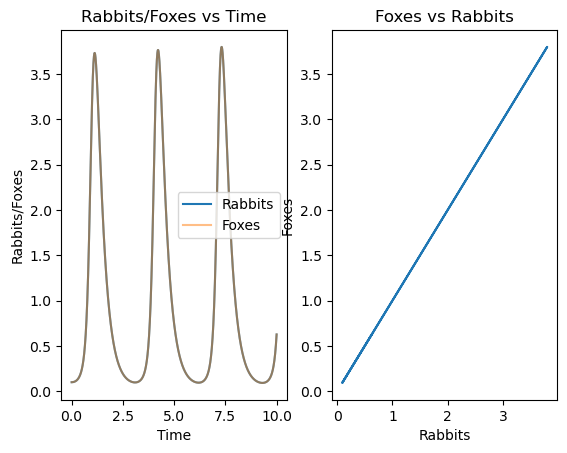

In [9]:
max_time = 10
dt = 0.001
rabbits0, foxes0 = 1, .1
time, rabbits, foxes = 0, rabbits0, foxes0
data = []

# Lotka-Volterra equations
def drabbits_dt(rabbits, foxes):
    a, b = 2, 2
    return a * rabbits - b * rabbits * foxes

def dfoxes_dt(rabbits, foxes):
    d, g, = 3, 3
    return d * foxes * rabbits - g * foxes

while True:
    data.append([time, rabbits, foxes])
    # Don't update the original variables because we need
    # the OLD values of rabbits to calculate foxes
    rabbits_new = rabbits + drabbits_dt(rabbits, foxes) * dt
    
    # Using the old value of rabbits
    foxes += dfoxes_dt(rabbits, foxes) * dt
    
    # No more need for two variables
    rabbits = rabbits_new
    
    time += dt
    if time > max_time:
        break
        
# Reorganising the data so I can easily access
# them without having to mess with indices

data = np.array(data)
data = {
    'time': data[:, 0],
    'rabbits': data[:, -1],
    'foxes': data[:, 2],
}

fig, ax = plt.subplots(nrows = 1, ncols = 2)
ax_with_time, ax_with_other = ax

# Plotting the individual species
ax_with_time.plot(data['time'], data['rabbits'], label='Rabbits')
ax_with_time.plot(data['time'], data['foxes'], label='Foxes', alpha=.5)
ax_with_time.set_ylabel('Rabbits/Foxes')
ax_with_time.set_xlabel('Time')
ax_with_time.set_title(f'Rabbits/Foxes vs Time')
ax_with_time.legend()

# Plotting one against the other
ax_with_other.plot(data['rabbits'], data['foxes'])
ax_with_other.set_xlabel('Rabbits')
ax_with_other.set_ylabel('Foxes')
ax_with_other.set_title(f'Foxes vs Rabbits')
plt.show()

### 2.3 Some things to note about the code

In [ ]:
# Encapsulated the derivatives in functions. A form of abstraction?
# rabbit_new had to be made to temporarily store the new value of rabbits. 
# Used a list and split them into a dictionary. 

## 3 Hello SciPy

### 3.1 SciPy odeint()

In [2]:
from scipy.integrate import odeint

### 3.2 Radioactivity

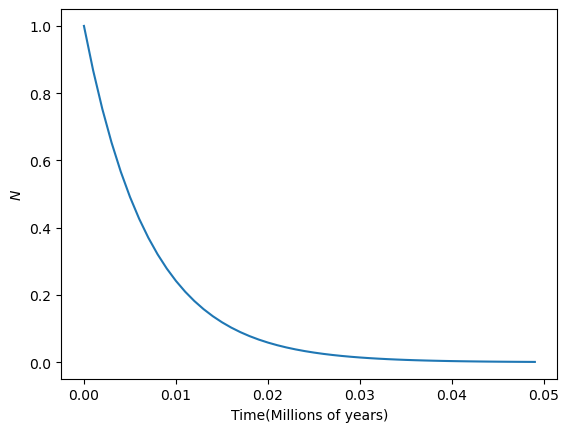

In [15]:
max_time = 0.05
dt = 0.001
decay_constant = 142
N0 = 1 # In billions of atoms


def dNdt(N, time, decay_constant):
    return - decay_constant * N

all_time = np.arange(0, max_time, dt)
all_N = odeint(y0 = [N0],
              func = dNdt,
              t = all_time,
              args = (decay_constant,)
              )
    
plt.plot(all_time, all_N)
plt.ylabel('$N$')
plt.xlabel('Time(Millions of years)')
plt.show()

### 3.3 Logistic Equation

In [ ]:
def dNdt(N, time, rate, carrying_capacity):
    return rate*N*(1-N/carrying_capacity)

exact_data = dNdt(N0, time, rate, K)
max_time, dt = 3, .1
N0, K, rate = 10, 100, 3

data = {}
data['time'] = np.arange(0, max_time, dt)
data['N'] = odeint(dNdt, N0, data['time'], (rate, K))
plt.plot(data['time'], data['N'], '.', label = 'Numerical')
plt.plot(data['time'], exact_data, label = 'Exact')
plt.legend(loc = 'lower right')
plt.ylabel('Population($N$)')
plt.xlabel('Time')
plt.hlines(K, 0, data['time'][-1],
          colors = 'grey', ls = 'dashed', zorder = 1)
plt.show()

### 3.4 Predator-Prey

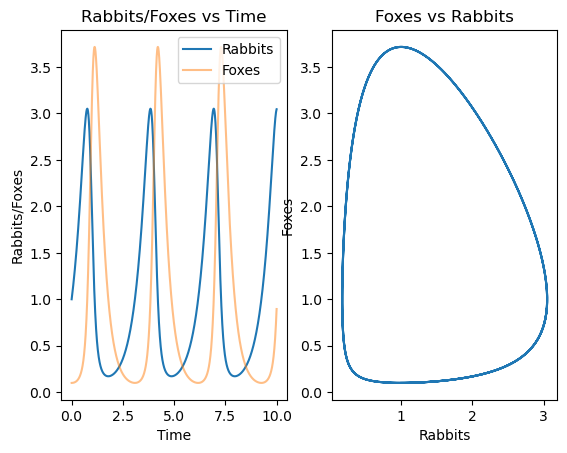

In [20]:
max_time = 10
dt = 0.001
rabbits0, foxes0 = 1, .1

# Lotka-Volterra equations
def dy_dt(y, t):
    '''
    Function for the derivative.
    - y contains all the variables for the simulation 
    - t is the dependant variable
    '''

    rabbits, foxes = y

    # Rabbits
    a, b = 2, 2
    drabbits_dt = a*rabbits - b*rabbits*foxes

    # Foxes
    d, g = 3, 3
    dfoxes_dt = d*foxes*rabbits - g*foxes

    return [drabbits_dt, dfoxes_dt]


data = {}
data['time'] = np.arange(0, max_time, dt)

# Note the order I pass the rabbit and fox information
results = odeint(y0=[rabbits0, foxes0],          # Dependant variable
                 func=dy_dt,                     # Derivatives
                 t=data['time']                  # Independant variable
                 )
# Extract the individual results (Note, the order matters)
data['rabbits'] = results[:, 0]
data['foxes'] = results[:, 1]

fig, ax = plt.subplots(nrows = 1, ncols = 2)
ax_with_time, ax_with_other = ax

# Plotting the individual species
ax_with_time.plot(data['time'], data['rabbits'], label='Rabbits')
ax_with_time.plot(data['time'], data['foxes'], label='Foxes', alpha=.5)
ax_with_time.set_ylabel('Rabbits/Foxes')
ax_with_time.set_xlabel('Time')
ax_with_time.set_title(f'Rabbits/Foxes vs Time')
ax_with_time.legend()

# Plotting one against the other
ax_with_other.plot(data['rabbits'], data['foxes'])
ax_with_other.set_xlabel('Rabbits')
ax_with_other.set_ylabel('Foxes')
ax_with_other.set_title(f'Foxes vs Rabbits')
plt.show()

## Exercise 1 :  The Lorentz Attaractor

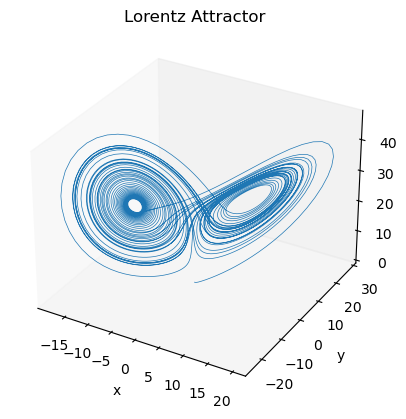

In [29]:
def lorentz_attractor(X, t, sigma, beta, rho):
    x, y, z = X
    dx_dt = sigma * (y - x)
    dy_dt = x * (rho - z) - y
    dz_dt = x * y - beta * z
    return [dx_dt, dy_dt, dz_dt]

sigma, beta, rho = 10, 8/3, 28
x0, y0, z0 = 0, 1, 0
time_points = np.arange(0, 50, 0.01)


results = odeint(lorentz_attractor, initial, time_points, args=(sigma, beta, rho))
x, y, z = results[:, 0], results[:, 1], results[:, 2]
ax = plt.axes(projection='3d')
ax.plot3D(x, y, z, lw = 0.5)
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
ax.set_title('Lorentz Attractor')
ax.grid(False)
ax.set_xticks([-15, -10, -5, 0, 5, 10, 15, 20])
plt.show()